<h1 style='font-size: 30px;'><b>Investigating Population Data Further</b></h1>
</br>

In [118]:
# Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

</br>
<h1 style='font-size: 24px;'><b>Importing the data</b></h1>
</br>

In [120]:
# Reading in CSVs into two separate dataframe variables.
df1 = pd.read_csv(r'C:\Users\rgrag\OneDrive\Documents\Portfolio-Career\Population\countrytable.csv')
df2 = pd.read_csv(r'C:\Users\rgrag\OneDrive\Documents\Portfolio-Career\Population\regiondata.csv')

# Combining both dataframe variables, so I have access to three different variables, if needed.
result = pd.concat([df1, df2], ignore_index=True
result.sort_values(by='Entity', inplace=True)
result.head(5)

,Entity,Year,Population,Lag Population,YoY Growth %,Global Pop Share %,Pop Rank,Percentile Rank,Z Score,Population Quartile,Growth Faster Than Avg,Size Class
0,Afghanistan ...,1950,7776133,NaN,NaN,0.31,45,81.36,-0.0619,1,f,Small
17591,Afghanistan ...,2003,22733007,21378081.0,6.34,0.35,46,80.93,-0.0379,1,t,Medium
17590,Afghanistan ...,2002,21378081,20284252.0,5.39,0.34,48,80.08,-0.0472,1,t,Medium
17589,Afghanistan ...,2001,20284252,20130279.0,0.76,0.32,48,80.08,-0.0544,1,f,Medium
17588,Afghanistan ...,2000,20130279,19887737.0,1.22,0.33,48,80.08,-0.0532,1,f,Medium


<h1 style='font-size: 24px;'><b>Filtering Countries</b></h1>
</br>

In [126]:
# There is whitespace after the names of every country, and it is causing problems when running code. This is to remove the white space.
df1['Entity'] = df1['Entity'].str.strip()

# The countries in this list are the top 10 countries in 1960, and in 2023. 
# They are being filtered out to observe the evolution of their growth rates over the decades.
filtered_entity = df1[df1['Entity'].isin(['Bangladesh', 'Brazil', 'China', 'Germany', 
                                         'India', 'Indonesia', 'Japan', 'Mexico', 'Nigeria', 
                                         'Pakistan', 'Russia', 'United Kingdom', 'United States'])]

# Checkling the data to see make sure there are no issues. 
filtered_entity[filtered_entity['Year'] == 2023].sort_values(by='Population', ascending=False).drop_duplicates().head(10)

,Entity,Year,Population,Lag Population,YoY Growth %,Global Pop Share %,Pop Rank,Percentile Rank,Z Score,Population Quartile,Growth Faster Than Avg,Size Class
7177,India,2023,1438069540,1.425423e+09,0.89,17.77,1,100.00,10.2717,1,f,Mega
3181,China,2023,1422584878,1.425180e+09,-0.18,17.58,2,99.58,10.1584,1,f,Mega
34187,United States,2023,343477286,3.415340e+08,0.57,4.24,3,99.15,2.2632,1,f,Large
7251,Indonesia,2023,281190021,2.788305e+08,0.85,3.48,4,98.73,1.8075,1,f,Large
29451,Pakistan,2023,247504458,2.437006e+08,1.56,3.06,5,98.31,1.5610,1,t,Large
28933,Nigeria,2023,227882899,2.231509e+08,2.12,2.82,6,97.88,1.4175,1,t,Large
19683,Brazil,2023,211140678,2.103064e+08,0.40,2.61,7,97.46,1.2950,1,f,Large
1257,Bangladesh,2023,171466945,1.693848e+08,1.23,2.12,8,97.03,1.0047,1,t,Large
12949,Russia,2023,145440454,1.455798e+08,-0.10,1.80,9,96.61,0.8143,1,f,Large
10063,Mexico,2023,129739713,1.286131e+08,0.88,1.60,10,96.19,0.6994,1,f,Large


</br>
<h1 style='font-size: 24px;'><b>Line Graph Comparing Population Trends Across Countries</b></h1>
</br>

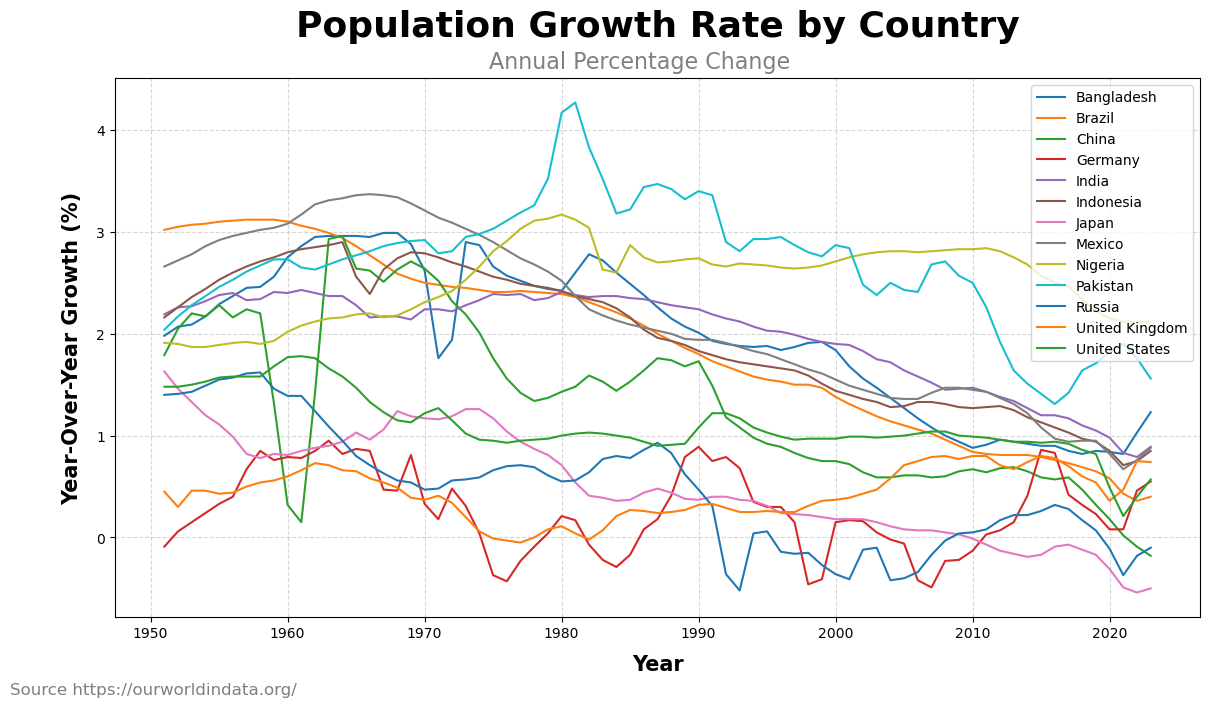

In [124]:
# Line Graph
filtered_entity = filtered_entity.drop_duplicates()
pivot = filtered_entity.pivot(index='Year', columns='Entity', values='YoY Growth %')
plt.figure(figsize=(14,7))
for entity in pivot:
    plt.plot(pivot.index, pivot[entity], label=entity)
plt.title('Population Growth Rate by Country', fontsize=26, fontweight='bold', pad=30)
plt.suptitle('Annual Percentage Change', fontsize=16, color='gray', y=0.92)
plt.figtext(0.05, 0, 'Source https://ourworldindata.org/', fontsize=12, color='gray', ha='left')
plt.xlabel('Year', fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel('Year-Over-Year Growth (%)', fontsize=15, fontweight='bold', labelpad=10)
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

In [59]:
# Observing the top 5 countries, to determine which countries to use to examine the data further. 
df1[df1['Year'] == 2023].sort_values(by='Population', ascending=False).drop_duplicates().head(5)

,Entity,Year,Population,Lag Population,YoY Growth %,Global Pop Share %,Pop Rank,Percentile Rank,Z Score,Population Quartile,Growth Faster Than Avg,Size Class
7177,India,2023,1438069540,1.425423e+09,0.89,17.77,1,100.00,10.2717,1,f,Mega
3181,China,2023,1422584878,1.425180e+09,-0.18,17.58,2,99.58,10.1584,1,f,Mega
34187,United States,2023,343477286,3.415340e+08,0.57,4.24,3,99.15,2.2632,1,f,Large
24789,Indonesia,2023,281190021,2.788305e+08,0.85,3.48,4,98.73,1.8075,1,f,Large
11913,Pakistan,2023,247504458,2.437006e+08,1.56,3.06,5,98.31,1.5610,1,t,Large


</br>
</br>
<h1 style='font-size: 24px;'><b>Bar Graphs Observing Population Trends on the 5 Most Populated Countries</b></h1>
</br>
</br>

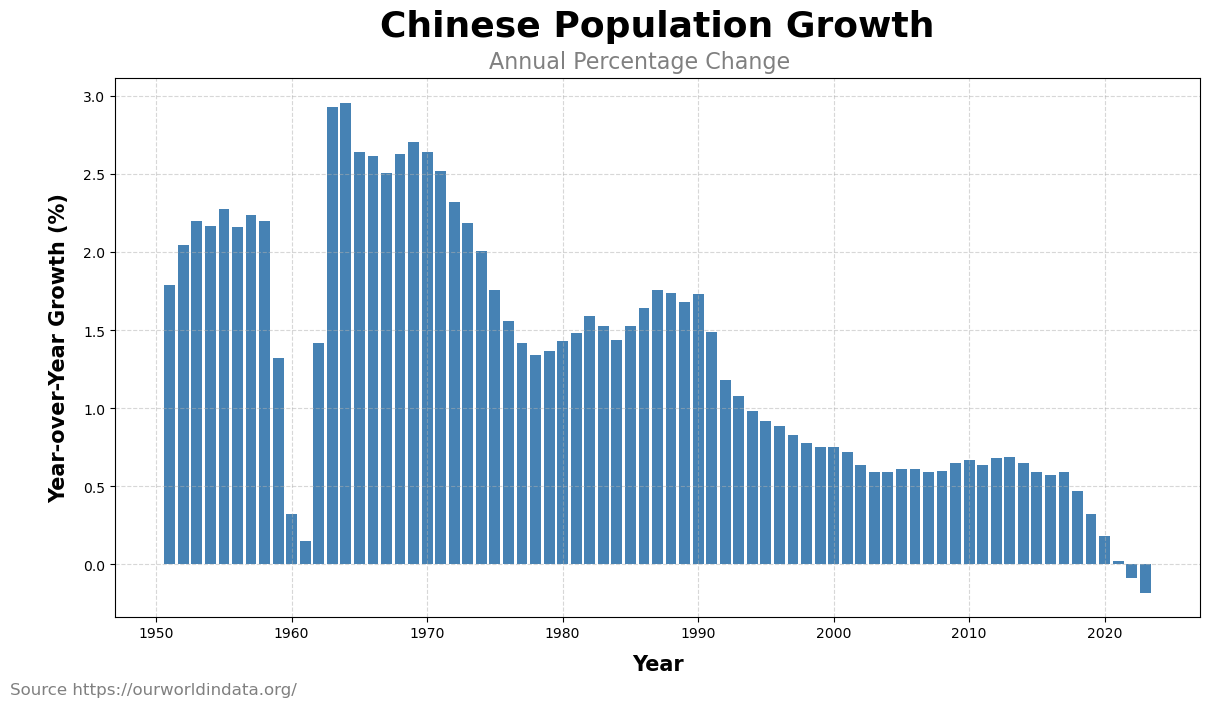

In [65]:
# Chinese Population Bar Graph
china_df = df1[df1['Entity'] == 'China']
plt.figure(figsize=(14,7))
plt.bar(china_df['Year'], china_df['YoY Growth %'], color='steelblue')

plt.title('Chinese Population Growth', fontsize=26, fontweight='bold', pad=30)
plt.suptitle('Annual Percentage Change', fontsize=16, color='gray', y=0.92)
plt.figtext(0.05, 0, 'Source https://ourworldindata.org/', fontsize=12, color='gray', ha='left')
plt.xlabel('Year', fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel('Year-over-Year Growth (%)', fontsize=15, fontweight='bold', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()

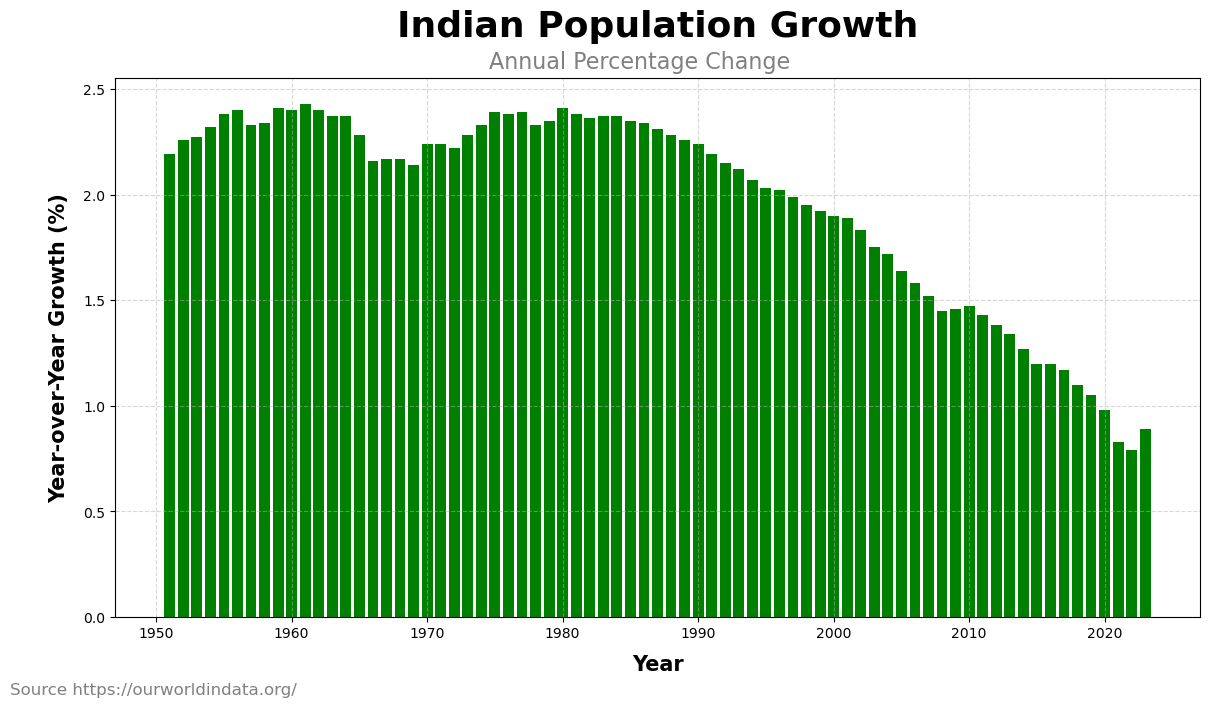

In [67]:
# Indian Population Bar Graph
india_df = df1[df1['Entity'] == 'India']
plt.figure(figsize=(14,7))
plt.bar(india_df['Year'], india_df['YoY Growth %'], color='green')

plt.title('Indian Population Growth', fontsize=26, fontweight='bold', pad=30)
plt.suptitle('Annual Percentage Change', fontsize=16, color='gray', y=0.92)
plt.figtext(0.05, 0, 'Source https://ourworldindata.org/', fontsize=12, color='gray', ha='left')
plt.xlabel('Year', fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel('Year-over-Year Growth (%)', fontsize=15, fontweight='bold', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()

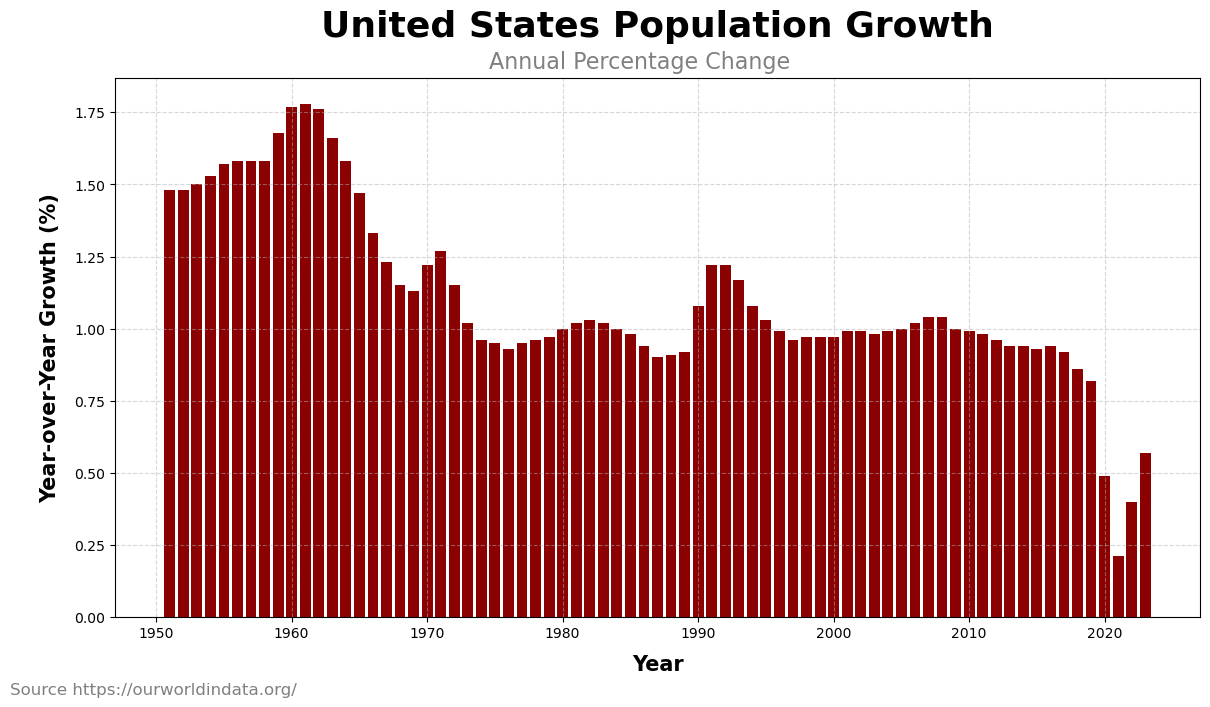

In [79]:
# United States Population Bar Graph
us_df = df1[df1['Entity'] == 'United States']
plt.figure(figsize=(14,7))
plt.bar(us_df['Year'], us_df['YoY Growth %'], color='darkred')

plt.title('United States Population Growth', fontsize=26, fontweight='bold', pad=30)
plt.suptitle('Annual Percentage Change', fontsize=16, color='gray', y=0.92)
plt.figtext(0.05, 0, 'Source https://ourworldindata.org/', fontsize=12, color='gray', ha='left')
plt.xlabel('Year', fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel('Year-over-Year Growth (%)', fontsize=15, fontweight='bold', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()

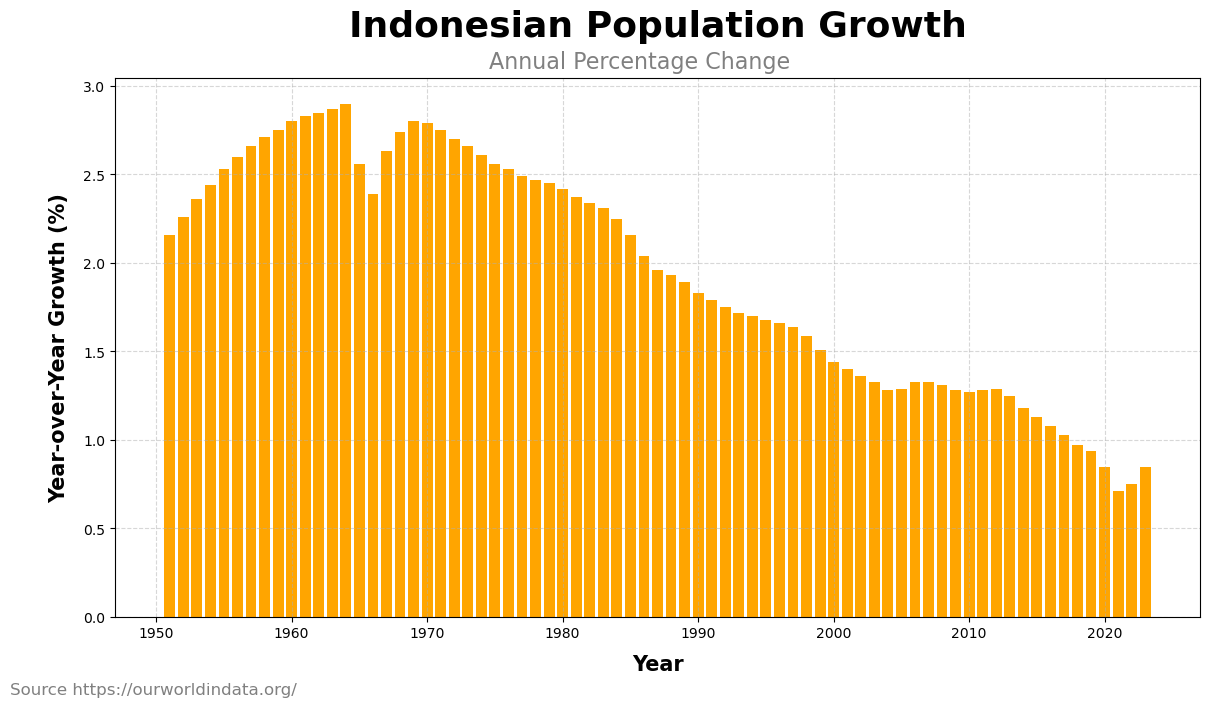

In [81]:
# Indonesian Population Bar Graph
indo_df = df1[df1['Entity'] == 'Indonesia']
plt.figure(figsize=(14,7))
plt.bar(indo_df['Year'], indo_df['YoY Growth %'], color='orange')

plt.title('Indonesian Population Growth', fontsize=26, fontweight='bold', pad=30)
plt.suptitle('Annual Percentage Change', fontsize=16, color='gray', y=0.92)
plt.figtext(0.05, 0, 'Source https://ourworldindata.org/', fontsize=12, color='gray', ha='left')
plt.xlabel('Year', fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel('Year-over-Year Growth (%)', fontsize=15, fontweight='bold', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()

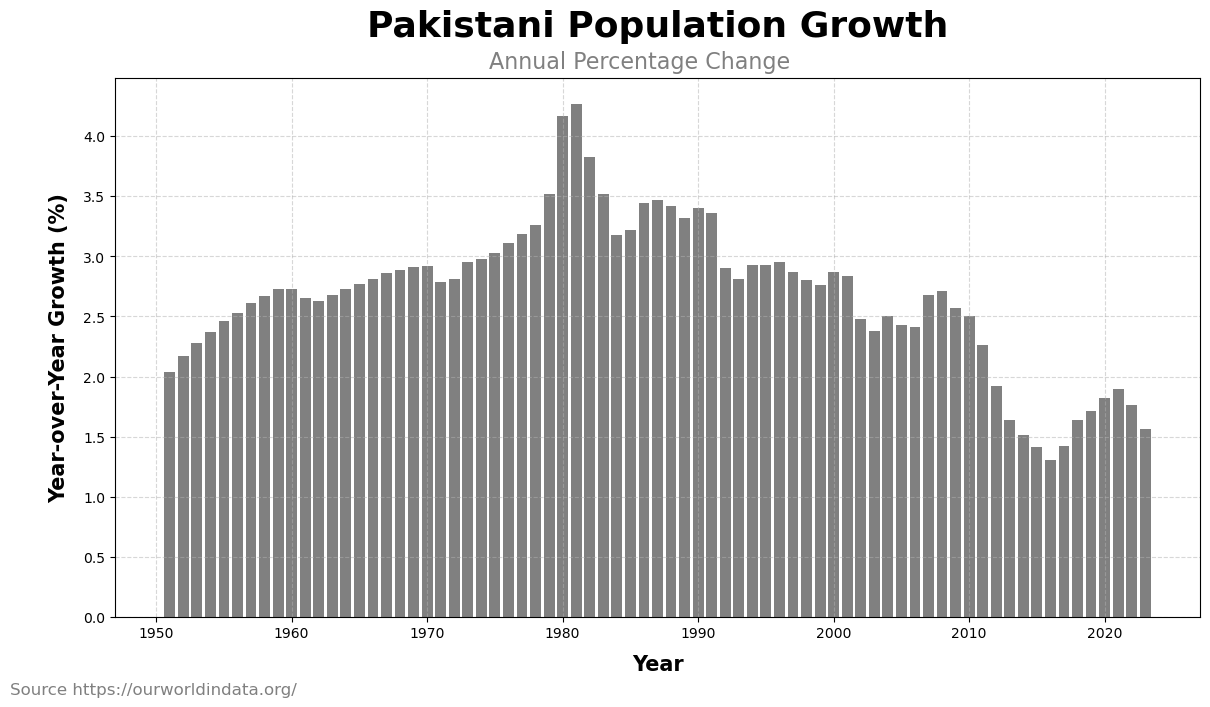

In [83]:
# Pakistani Population Bar Graph
paki_df = df1[df1['Entity'] == 'Pakistan']
plt.figure(figsize=(14,7))
plt.bar(paki_df['Year'], paki_df['YoY Growth %'], color='gray')

plt.title('Pakistani Population Growth', fontsize=26, fontweight='bold', pad=30)
plt.suptitle('Annual Percentage Change', fontsize=16, color='gray', y=0.92)
plt.figtext(0.05, 0, 'Source https://ourworldindata.org/', fontsize=12, color='gray', ha='left')
plt.xlabel('Year', fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel('Year-over-Year Growth (%)', fontsize=15, fontweight='bold', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.5)

# plt.tight_layout()

</br>
</br>
<h1 style='font-size: 24px;'><b>Box Plot Examining Growth Rate Ranges Between Top Countries</b></h1>
</br>
</br>

<Figure size 1400x700 with 0 Axes>

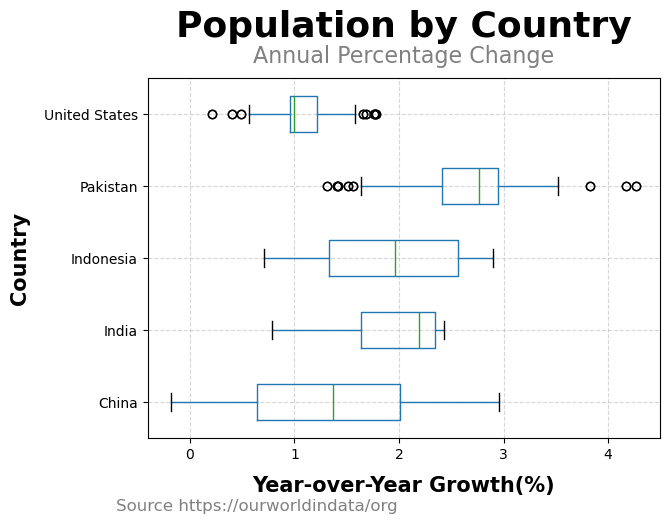

In [105]:
top_5 = ['India', 'China', 'United States', 'Indonesia',  'Pakistan']

box_df = df1[df1['Entity'].isin(top_5)]
plt.figure(figsize=(14,7))
box_df.boxplot(column='YoY Growth %', by='Entity', grid=False, vert=False)

plt.title('Population by Country', fontsize=26, fontweight='bold', pad=30)
plt.suptitle('Annual Percentage Change', fontsize=16, color='gray', y=0.97)
plt.figtext(0.05, 0, 'Source https://ourworldindata/org', fontsize=12, color='gray', ha='left')
plt.xlabel('Year-over-Year Growth(%)', fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel('Country', fontsize=15, fontweight='bold', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()